In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('sw_results.csv')
df

,Year,Flow Class,Qr,S_top,S_bot,T_top,T_bot,V_top,V_mix,rho_top,rho_bot,Fr,Ls,D_int,u_exit,S_top_prime,S_bot_prime,S_top_mix,S_bot_mix
0,2018,high,413.23,2.21,20.39,14.50,12.63,-0.1807,-0.1490,1000.89,1015.12,1.4889,-20,13.04,0.2066,3.55,27.63,15.75,29.29
1,2018,low,53.15,6.60,22.14,5.35,7.20,-0.2172,-0.0590,1005.19,1017.21,0.2270,1420,3.72,0.0266,11.88,28.55,14.41,28.88
2,2018,max,379.02,4.86,21.91,8.49,11.08,-0.1890,-0.0845,1003.63,1016.52,1.5085,-20,13.15,0.1895,7.10,28.09,19.33,29.86
3,2019,high,367.81,2.98,21.29,15.26,13.05,-0.1723,-0.1388,1001.37,1015.73,1.3126,-10,11.99,0.1839,4.46,27.82,16.53,29.33
4,2019,low,24.18,7.80,23.20,4.52,6.87,-0.2280,-0.0569,1006.16,1018.08,0.1043,8500,2.22,0.0121,11.58,28.22,13.59,28.67
5,2019,max,437.98,2.16,22.26,18.27,14.37,-0.1721,-0.1342,1000.21,1016.23,1.4022,-10,12.53,0.2190,3.37,28.02,16.83,29.31
6,2018,mid,241.86,4.53,23.29,15.90,13.86,-0.1974,-0.0941,1002.44,1017.12,0.8461,0,8.95,0.1209,6.73,28.34,19.68,29.54
7,2019,mid,174.03,6.98,24.71,11.63,12.05,-0.2049,-0.0870,1004.95,1018.53,0.6590,20,7.57,0.0870,7.54,28.12,20.14,29.66


0.0427391796035127
0.0034460978372712614


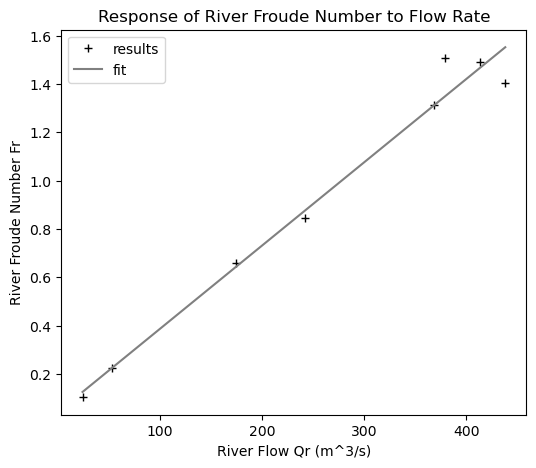

In [3]:
QrFr = stats.linregress(df['Qr'], df['Fr'])

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ax.plot(df['Qr'], df['Fr'],'k+',label='results')
ax.plot(df['Qr'].sort_values(ascending=True), QrFr.intercept + QrFr.slope * df['Qr'].sort_values(ascending=True), 'grey', label='fit')
ax.set_xlabel('River Flow Qr (m^3/s)')
ax.set_ylabel('River Froude Number Fr')
ax.set_title('Response of River Froude Number to Flow Rate')
ax.legend()

print(QrFr.intercept)
print(QrFr.slope)

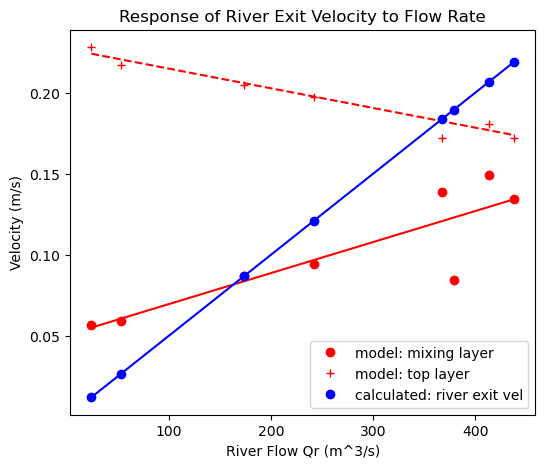

In [4]:
QrVmix = stats.linregress(df['Qr'], -df['V_mix'])
QrVtop = stats.linregress(df['Qr'], -df['V_top'])
Qruexit = stats.linregress(df['Qr'], df['u_exit'])

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ax.plot(df['Qr'], -df['V_mix'],'ro',label='model: mixing layer')
ax.plot(df['Qr'].sort_values(ascending=True), QrVmix.intercept + QrVmix.slope * df['Qr'].sort_values(ascending=True), 'r')

ax.plot(df['Qr'], -df['V_top'],'r+',label='model: top layer')
ax.plot(df['Qr'].sort_values(ascending=True), QrVtop.intercept + QrVtop.slope * df['Qr'].sort_values(ascending=True), 'r--')

ax.plot(df['Qr'], df['u_exit'],'bo',label='calculated: river exit vel')
ax.plot(df['Qr'].sort_values(ascending=True), Qruexit.intercept + Qruexit.slope * df['Qr'].sort_values(ascending=True), 'b')

ax.set_xlabel('River Flow Qr (m^3/s)')
ax.set_ylabel('Velocity (m/s)')
ax.set_title('Response of River Exit Velocity to Flow Rate')
ax.legend()

2.330643597405251
0.026072727073992708


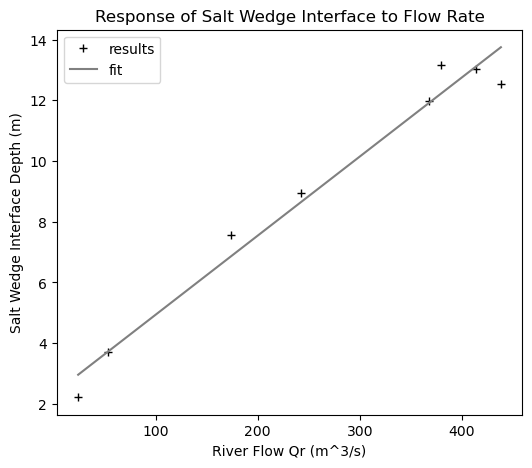

In [5]:
QrDint = stats.linregress(df['Qr'], df['D_int'])

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ax.plot(df['Qr'], df['D_int'],'k+',label='results')
ax.plot(df['Qr'].sort_values(ascending=True), QrDint.intercept + QrDint.slope * df['Qr'].sort_values(ascending=True), 'grey', label='fit')
ax.set_xlabel('River Flow Qr (m^3/s)')
ax.set_ylabel('Salt Wedge Interface Depth (m)')
ax.set_title('Response of Salt Wedge Interface to Flow Rate')
ax.legend()

print(QrDint.intercept)
print(QrDint.slope)

-0.039961438921390174
0.018659170580444463


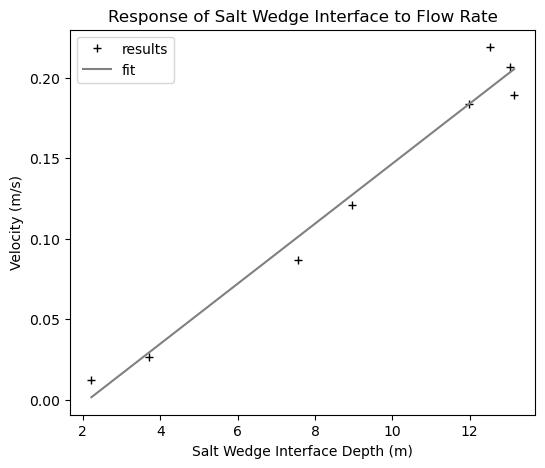

In [6]:
Dintuexit = stats.linregress(df['D_int'], df['u_exit'])

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ax.plot(df['D_int'], df['u_exit'],'k+',label='results')
ax.plot(df['D_int'].sort_values(ascending=True), Dintuexit.intercept + Dintuexit.slope * df['D_int'].sort_values(ascending=True), 'grey', label='fit')
ax.set_xlabel('Salt Wedge Interface Depth (m)')
ax.set_ylabel('Velocity (m/s)')
ax.set_title('Response of Salt Wedge Interface to Flow Rate')
ax.legend()

print(Dintuexit.intercept)
print(Dintuexit.slope)

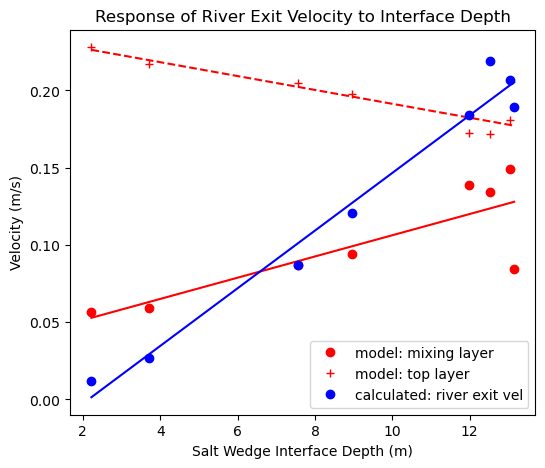

In [7]:
DintVmix = stats.linregress(df['D_int'], -df['V_mix'])
DintVtop = stats.linregress(df['D_int'], -df['V_top'])
Dintuexit = stats.linregress(df['D_int'], df['u_exit'])

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ax.plot(df['D_int'], -df['V_mix'],'ro',label='model: mixing layer')
ax.plot(df['D_int'].sort_values(ascending=True), DintVmix.intercept + DintVmix.slope * df['D_int'].sort_values(ascending=True), 'r')

ax.plot(df['D_int'], -df['V_top'],'r+',label='model: top layer')
ax.plot(df['D_int'].sort_values(ascending=True), DintVtop.intercept + DintVtop.slope * df['D_int'].sort_values(ascending=True), 'r--')

ax.plot(df['D_int'], df['u_exit'],'bo',label='calculated: river exit vel')
ax.plot(df['D_int'].sort_values(ascending=True), Dintuexit.intercept + Dintuexit.slope * df['D_int'].sort_values(ascending=True), 'b')

ax.set_xlabel('Salt Wedge Interface Depth (m)')
ax.set_ylabel('Velocity (m/s)')
ax.set_title('Response of River Exit Velocity to Interface Depth')
ax.legend()

In [9]:
def entrainment_vel(u_exit, h0, delta_x, S_top_prime, S_bot_prime, S_top, S_bot):
    return ((u_exit * h0)/delta_x) * ((S_top_prime - S_top)/((S_bot + S_bot_prime)/2 - S_top_prime))


In [12]:
df['D_int'][df['D_int'] > 10] = 9.5

/tmp/ipykernel_22729/2103344812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['D_int'][df['D_int'] > 10] = 9.5


In [28]:
deltax = 4400  # meters
We = 3000  # meters, width of the estuary
df['wE1'] = entrainment_vel(df['u_exit'], df['D_int'], deltax, df['S_top_mix'], df['S_bot_mix'], df['S_top'], df['S_bot'])
df['wE2'] = entrainment_vel(-df['V_mix'], df['D_int'], deltax, df['S_top_mix'], df['S_bot_mix'], df['S_top'], df['S_bot'])

df['Qe1'] = df['wE1'] * deltax * We
df['Qe2'] = df['wE2'] * deltax * We
df

,Year,Flow Class,Qr,S_top,S_bot,T_top,T_bot,V_top,V_mix,rho_top,...,u_exit,S_top_prime,S_bot_prime,S_top_mix,S_bot_mix,wE,wE1,wE2,Qe1,Qe2
0,2018,high,413.23,2.21,20.39,14.50,12.63,-0.1807,-0.1490,1000.89,...,0.2066,3.55,27.63,15.75,29.29,0.000664,0.000664,0.000479,8770.613201,6325.369637
1,2018,low,53.15,6.60,22.14,5.35,7.20,-0.2172,-0.0590,1005.19,...,0.0266,11.88,28.55,14.41,28.88,0.000016,0.000016,0.000035,208.868951,463.280757
2,2018,max,379.02,4.86,21.91,8.49,11.08,-0.1890,-0.0845,1003.63,...,0.1895,7.10,28.09,19.33,29.86,0.000903,0.000903,0.000403,11922.021739,5316.152174
3,2019,high,367.81,2.98,21.29,15.26,13.05,-0.1723,-0.1388,1001.37,...,0.1839,4.46,27.82,16.53,29.33,0.000613,0.000613,0.000462,8088.562927,6104.907745
4,2019,low,24.18,7.80,23.20,4.52,6.87,-0.2280,-0.0569,1006.16,...,0.0121,11.58,28.22,13.59,28.67,0.000003,0.000003,0.000013,37.796107,177.735412
5,2019,max,437.98,2.16,22.26,18.27,14.37,-0.1721,-0.1342,1000.21,...,0.2190,3.37,28.02,16.83,29.31,0.000775,0.000775,0.000475,10224.768844,6265.588945
6,2018,mid,241.86,4.53,23.29,15.90,13.86,-0.1974,-0.0941,1002.44,...,0.1209,6.73,28.34,19.68,29.54,0.000553,0.000553,0.000431,7302.063808,5683.409465
7,2019,mid,174.03,6.98,24.71,11.63,12.05,-0.2049,-0.0870,1004.95,...,0.0870,7.54,28.12,20.14,29.66,0.000280,0.000280,0.000280,3690.721533,3690.721533


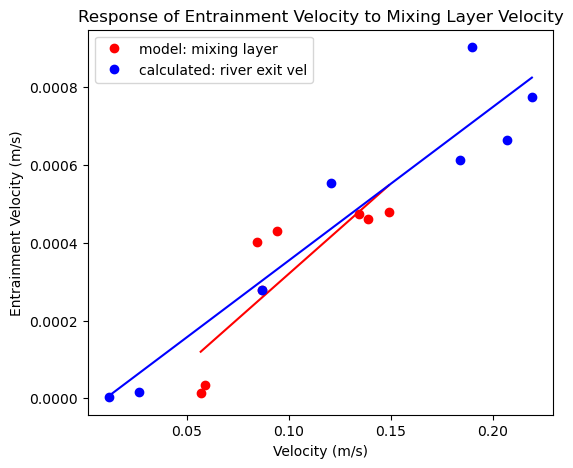

In [26]:
VmixwE2 = stats.linregress(-df['V_mix'], df['wE2'])
uexitwE1 = stats.linregress(df['u_exit'], df['wE1'])

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ax.plot(-df['V_mix'], df['wE2'],'ro',label='model: mixing layer')
ax.plot(-df['V_mix'].sort_values(ascending=True), VmixwE2.intercept + VmixwE2.slope * -df['V_mix'].sort_values(ascending=True), 'r')

ax.plot(df['u_exit'], df['wE1'],'bo',label='calculated: river exit vel')
ax.plot(df['u_exit'].sort_values(ascending=True), uexitwE1.intercept + uexitwE1.slope * df['u_exit'].sort_values(ascending=True), 'b')

ax.set_xlabel('Velocity (m/s)')
ax.set_ylabel('Entrainment Velocity (m/s)')
ax.set_title('Response of Entrainment Velocity to Mixing Layer Velocity')
ax.legend()

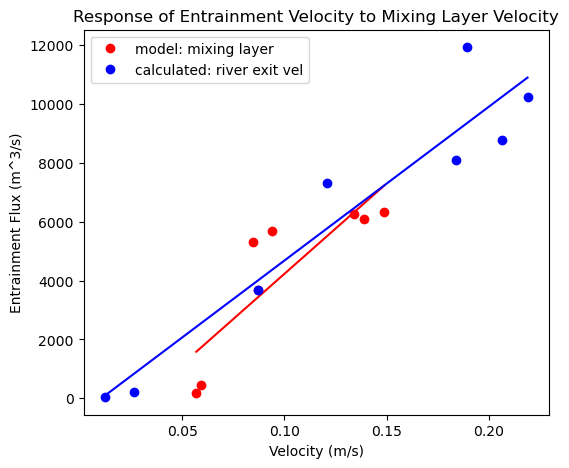

In [30]:
VmixQe2 = stats.linregress(-df['V_mix'], df['Qe2'])
uexitQe1 = stats.linregress(df['u_exit'], df['Qe1'])

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ax.plot(-df['V_mix'], df['Qe2'],'ro',label='model: mixing layer')
ax.plot(-df['V_mix'].sort_values(ascending=True), VmixQe2.intercept + VmixQe2.slope * -df['V_mix'].sort_values(ascending=True), 'r')

ax.plot(df['u_exit'], df['Qe1'],'bo',label='calculated: river exit vel')
ax.plot(df['u_exit'].sort_values(ascending=True), uexitQe1.intercept + uexitQe1.slope * df['u_exit'].sort_values(ascending=True), 'b')

ax.set_xlabel('Velocity (m/s)')
ax.set_ylabel('Entrainment Flux (m^3/s)')
ax.set_title('Response of Entrainment Flux to Mixing Layer Velocity')
ax.legend()